## **import libraries**

In [318]:
import os # for loading images
from PIL import Image # for loading and showing images
import numpy as np # for calculating, reshape and other calculations
import matplotlib.pyplot as plt # for viewing images and plotting

## **load image dataset**

In [313]:
# define the path to your image dataset
# you can change your images path
images_path = 'C:/Users/yangq/OneDrive/Desktop/computer vision/archive (1)/train'

# define the initial lists of images and labels
# images: a list to store loaded images
# labels: a list to store labels (e.g., folder names corresponding to image categories)
images = []
labels = []

# os.listdir(images_path): retrive all files or folders inside the images dataset path
# os.path.join(images_path, folder_name): construct our folder_path
# os.path.isdir(folder_path): Ensures that folder_path is a directory
# we load every images in the folder train and add them into the list images one by one
# we add each images' corresponding label into the labels list
for folder_name in os.listdir(images_path):
    folder_path = os.path.join(images_path, folder_name)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            images.append(img)
            labels.append(folder_name)

### (2.1) show the image

Label: cats


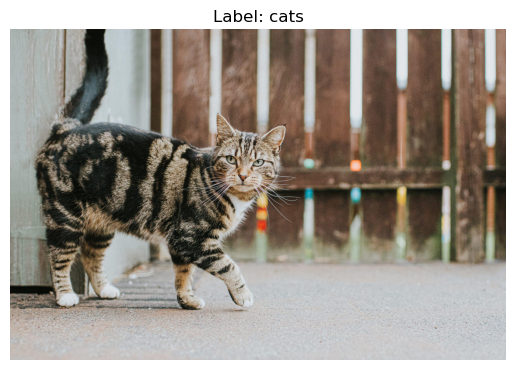

In [316]:
if images:
    print(f"Label: {labels[0]}")
    plt.imshow(images[0])
    plt.axis("off")  # Turn off the axes
    plt.title(f"Label: {labels[0]}")
    plt.show()
else:
    print("No images to display.")

### (2.2) show image categories

In [44]:
unique_labels = set(labels)
print(f"Unique labels: {unique_labels}")

Unique labels: {'cats', 'dogs'}


### each number of image

In [10]:
from collections import Counter

label_counts = Counter(labels)
print("Label counts:")
for label, count in label_counts.items():
    print(f"{label}: {count} images")

Label counts:
cats: 279 images
dogs: 278 images


## **Process dataset**

#### We obtain images and labels two lists, so if we want to use ML models, we need to transfer them into the array respectively.

In [52]:
#  for our output
Y_1= np.array(labels)
Y_1

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

#### To transfer images list into an array, we need to check each image dimension first!

In [60]:
# check each image shape
for i, img in enumerate(images):
    print(f"Image {i} shape: {np.array(img).shape}")

Image 0 shape: (1333, 2000, 3)
Image 1 shape: (183, 275, 3)
Image 2 shape: (168, 300, 3)
Image 3 shape: (628, 1200, 3)
Image 4 shape: (162, 311, 3)
Image 5 shape: (159, 318, 3)
Image 6 shape: (549, 976, 3)
Image 7 shape: (1200, 1200, 3)
Image 8 shape: (176, 287, 3)
Image 9 shape: (1414, 2121, 3)
Image 10 shape: (2848, 4272, 3)
Image 11 shape: (500, 1400, 3)
Image 12 shape: (630, 1200, 3)
Image 13 shape: (648, 1155, 3)
Image 14 shape: (179, 282, 3)
Image 15 shape: (637, 640, 3)
Image 16 shape: (252, 400, 3)
Image 17 shape: (1200, 1200, 3)
Image 18 shape: (648, 1155, 3)
Image 19 shape: (549, 976, 3)
Image 20 shape: (667, 1000, 3)
Image 21 shape: (1050, 1400, 3)
Image 22 shape: (1329, 1920, 3)
Image 23 shape: (720, 1280, 3)
Image 24 shape: (2049, 3000, 3)
Image 25 shape: (225, 225, 3)
Image 26 shape: (600, 900, 3)
Image 27 shape: (675, 1200, 3)
Image 28 shape: (720, 1280, 3)
Image 29 shape: (683, 1024, 3)
Image 30 shape: (200, 350, 3)
Image 31 shape: (626, 626, 3)
Image 32 shape: (450, 80

#### So we need to rehape each image, the each new image has the same dimension.

### (3.1) reshape each image into the new image with same dimension

In [69]:
# define output image size
output_size = (128, 128)  # (Height, Width)

# reshape all images to the target size
resized_images = []
for i, img in enumerate(images):
    # Ensure all images are in RGB format (3 channels)
    img = img.convert("RGB")  # Convert to RGB
    img_resized = img.resize(output_size)  # Resize the image
    img_array = np.array(img_resized)  # Convert to NumPy array
    resized_images.append(img_array) # add new image into the array

### (3.2) convert it into an np.array

In [76]:
# Convert the resized images list to a single NumPy array
image_array = np.array(resized_images)
print("Final array shape:", image_array.shape)

Final array shape: (557, 128, 128, 3)


## **Train our dataset**

### (4.1) Flatting the data

#### To use ML models, we need to flat our image data (from 3 dimensions into one dimension)

In [93]:
X_train_flatten = image_array.reshape(image_array.shape[0], -1)
X_train_flatten.shape

(557, 49152)

### (4.2) Import model

In [301]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [142]:
X_train = X_train_flatten / 128
Y_train = Y_1
print('Train image shape: ', X_train.shape)
print('Train target shape', Y_train.shape)

Train image shape:  (557, 49152)
Train target shape (557,)


In [191]:
lg = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=10000, C = 10)

In [193]:
lg.fit(X_train,Y_train)

LogisticRegression(C=10, max_iter=10000, random_state=42)

## **Test our model**

### (5.1) load our test images

In [107]:
# Define the path to your image dataset
images_test_path = 'C:/Users/yangq/OneDrive/Desktop/computer vision/archive (1)/test'

images_test = []
labels_test = []

for folder_name in os.listdir(images_test_path):
    folder_path2 = os.path.join(images_test_path, folder_name)
    if os.path.isdir(folder_path2):
        for filename in os.listdir(folder_path2):
            image_test_path = os.path.join(folder_path2, filename)
            img_test = Image.open(image_test_path)
            images_test.append(img_test)
            labels_test.append(folder_name)

In [115]:
unique_test_labels = set(labels_test)
print(f"Unique labels: {unique_test_labels}")

Unique labels: {'cats', 'dogs'}


### (5.2) convert test lists into array

In [118]:
Y_2 = np.array(labels_test)
Y_2.shape

(140,)

In [122]:
# check each image shape
for i, img in enumerate(images_test):
    print(f"Image {i} shape: {np.array(img).shape}")

Image 0 shape: (769, 615, 3)
Image 1 shape: (720, 1200, 3)
Image 2 shape: (183, 276, 3)
Image 3 shape: (590, 890, 3)
Image 4 shape: (495, 459, 3)
Image 5 shape: (178, 284, 3)
Image 6 shape: (195, 259, 3)
Image 7 shape: (338, 600, 3)
Image 8 shape: (225, 225, 3)
Image 9 shape: (183, 275, 3)
Image 10 shape: (443, 640, 3)
Image 11 shape: (177, 285, 3)
Image 12 shape: (320, 480, 3)
Image 13 shape: (506, 900, 3)
Image 14 shape: (900, 1200, 3)
Image 15 shape: (384, 384, 3)
Image 16 shape: (168, 300, 3)
Image 17 shape: (560, 1440, 3)
Image 18 shape: (750, 900, 3)
Image 19 shape: (193, 261, 3)
Image 20 shape: (649, 1240, 3)
Image 21 shape: (174, 289, 3)
Image 22 shape: (1200, 1200, 3)
Image 23 shape: (181, 278, 3)
Image 24 shape: (177, 284, 3)
Image 25 shape: (225, 225, 3)
Image 26 shape: (162, 311, 3)
Image 27 shape: (1000, 1500, 3)
Image 28 shape: (163, 310, 3)
Image 29 shape: (187, 270, 3)
Image 30 shape: (480, 480, 3)
Image 31 shape: (549, 825, 3)
Image 32 shape: (1200, 1200, 3)
Image 33 s

#### (5.2.1) resize test images

In [125]:
# Define target size
output_test_size = (128, 128)  # (Height, Width)

# Resize all images to the target size
resized_test_images = []
for i, img in enumerate(images_test):
    # Ensure all images are in RGB format (3 channels)
    img = img.convert("RGB")  # Convert to RGB
    img_test_resized = img.resize(output_test_size)  # Resize the image
    img_test_array = np.array(img_test_resized)  # Convert to NumPy array
    resized_test_images.append(img_test_array)

In [131]:
# Convert the resized images list to a single NumPy array
image_test_array = np.array(resized_test_images)
print("Final array shape:", image_test_array.shape)

Final array shape: (140, 128, 128, 3)


### (5.3) Flatting test image array

In [140]:
X_test_flatten = image_test_array.reshape(image_test_array.shape[0], -1)

In [144]:
X_test = X_test_flatten / 128
Y_test = Y_2
print('Test image shape: ', X_train.shape)
print('Test target shape', Y_train.shape)

Test image shape:  (557, 49152)
Test target shape (557,)


In [195]:
y_logic_pred = lg.predict(X_test)

In [197]:
accuracy_score(Y_test, y_logic_pred)*100

59.285714285714285

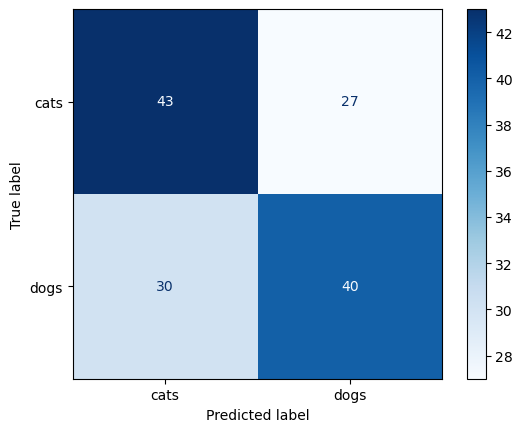

In [303]:
conf_matrix = confusion_matrix(Y_test, y_logic_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues")

## **Random Froest**

In [286]:
from sklearn.ensemble import RandomForestClassifier

rfl = RandomForestClassifier(criterion = 'gini', max_features = 'log2', random_state=42, n_estimators=100,  max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
rfl.fit(X_train, Y_train)

RandomForestClassifier(max_features='log2', random_state=42)

In [291]:
Y_rfl_pred = rfl.predict(X_test)
accuracy = accuracy_score(Y_test, Y_rfl_pred)
print("Random Forest Accuracy:", accuracy * 100)

Random Forest Accuracy: 62.142857142857146


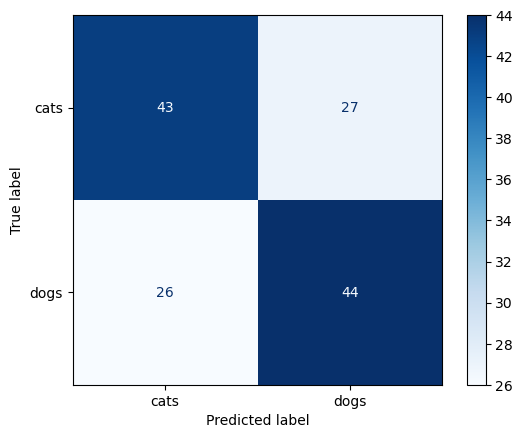

In [299]:
conf_matrix = confusion_matrix(Y_test, Y_rfl_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues")

## **SVM**

In [285]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', C=1, gamma=1, degree=4)
svm.fit(X_train, Y_train)

SVC(C=1, degree=4, gamma=1, kernel='poly')

In [289]:
Y_svm_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_svm_pred)
print("SVM Accuracy:", accuracy_svm * 100)

SVM Accuracy: 59.285714285714285


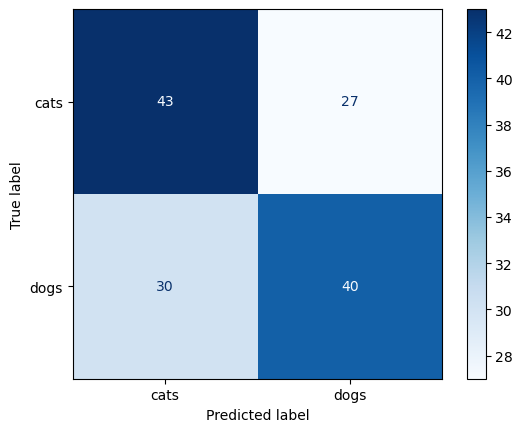

In [305]:
conf_matrix = confusion_matrix(Y_test, Y_svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues")

## **Conclusion**

### Whether it is a linear or nonlinear ML model, we get inaccurate results. Next, we can consider using neural networks (CNN) to process it.